In [3]:

## making a basic shallow NN in numpy, based on week 3 of Neural Networks and Deep Learning

## Aiming to predict whether a plant is species setosa or not

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Deeplearning.ai notation: [1] = activations out of layer 1, [2] = activitions from layer 2, etc
# instead of backprop from A (sig transformed) to Z (linear transformed) and that's it, that
# is done several times a la A, Z, A, Z, etc for backprop, depending on the number of layers you have
# a(i) refers to node i in that layer

# '2 layer' NN has one hidden layer (plus input and output layers)

# if 4 weights and 5 neurons in a hidden layer, w in that layer will have dims (5, 4) and b will have dims (5, 1)
# and if so, output layer after this was w dims (1, 5) and b dims (1, 1)

### hidden layer
# multiply (5,4) hidden layer weights by (4, 1)  input features array (assuming 4 is number of input features)
# (4,1) array might become (4, m) where m is training sample size
# assuming input is (4, 1), gets a result of (5, 1) which goes through sigmoid to get A=(5,1) array

### output layer
# multiply weights layer (1, 5) by input (5,1), plus b for linear trans to get (1,1)
# then sigmoid transform to get (1,1) output



#####
# x :dims = n * m (input of n features and m data)
# Z (output of linear regession), dims = lc * m
# A (output of sigmoid), dims = lc * m (lc = layer count)




In [ ]:
## steps:

# forward pass through layers
# get derivatives for all weights
# calculate new weights



In [23]:
### Activation functions:
# denote generic activation function as g(x)

# sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(sigmoid_output):
    return sigmoid_output * (1- sigmoid_output)   # * = element-wise mult; @ = matrix mult



# tanh. A shifted version of sigmoid (returns range -1 to 1 instead of 0 to 1)
    # the mean of tanh is closer to 0 than sigmoid, which can make the outputs easier for later layers to use
    # than sigmoid, where the mean is closer to 0.5
    # says apart from the output layer, tanh() is better than sigmoid
def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

def tanh_derivative(tanh_output):
    return 1 - np.power(tanh_output, 2)

    

# ReLu: better for larger values as the gradient doesn't become close to 0, which it does for tanh and sigmoid
# ReLu trains faster because of this 
def relu(x):
    return np.where(x >= 0, x, 0)

def relu_derivative(x):       
    """note x is the original input to relu, not the output from relu, unlike other
    derivatives of activation functions"""
    return np.where(x >= 0, 1, 0)



# Leaky ReLu: max(0.01*x, x)  # so not exactly zero for negative numbers
def leaky_relu(x):
    return np.where(x >= 0, x, x*0.01)

def leaky_relu_derivative(x):
    """As with ReLu derivative, x is the original input to leaky_relu(), not it's input"""
    return np.where(x >= 0, 1, 0.01)



### rules of thumb
# if classification is binary then sigmoid is a good output layer activation
# for all other units ReLu is the most popular default, so a decent default choice



# source of activation function derivative functions:
# https://www.coursera.org/learn/neural-networks-deep-learning/lecture/qcG1j/derivatives-of-activation-functions


In [24]:
#### Gradient descent
## Params: W[1], b[1], W[2], b[2]   (represent weights and intersect value for each layer)
## n[0] (input features count), n[1] (hidden unit count), n[2] (output units)

# W[1] dims: n[1] * n[0]
# B[1] dims: n[1] * 1
# W[2] dims: n[2] * n[1]
# B[2] dims: n[2] * 1

# X = input data
# Z[1] = hidden layer linear results       dims: n[1] * 1
# A[1] = hidden layer activated results
# Z[1] = output layer linear results         dims: n[2] * 1
# A[1] = output layer activated results

# Y dims: m * 1  (where m is number of data in)
# A[2] dims: m * 1  (the prediction: result of output activation)

# can use same cost function as logistic regression (think this is because output layer using sigmoid activation)
# J = notation for cost

# dW[1] = dJ/dW[1] 
# dB[1] = dJ/dB[1] 
# ... and so on for all layers


# using _ as stand-in for [] notation
"""
dZ_2 = A_2 - Y                           # dims: n[2] * m
dW_2 = (1/m) * (dZ_2 @ A_1.T)
dB_2 = (1/m) * np.sum(dZ_2, axis=1, keepdims=True)  # sums horizontally

dZ_1 = (W_2.T @ dZ_2) * relu_derivative(Z_1)   # dims: n[1] * m (where m is number of data inputs)
        # W_2.T dims = n[1] * n[2]
        # dZ_2 dims = n[2] * m
        # relu_derivative(Z_1) dims = n[1] * m
        ### so get n[1] * m output from matrix mult, then do element wise mult with relu_derivative(Z_1)

dW_1 = (1/m) * (dZ_1 @ X.T)
dB_1 = (1/m) * np.sum(dZ_1, axis=1, keepdims=True) 
"""
## confident all of the above use @ and * in the right places




# based on:
# https://www.coursera.org/learn/neural-networks-deep-learning/lecture/6dDj7/backpropagation-intuition-optional

NameError: name 'A_2' is not defined

In [28]:
#### when initialising weights
#### this is just an example: the input dimensions are wrong here

W_weights = np.random.randn(2, 2) / 100   # set small random weights for W    
B_weights = np.zeros((2, 1))           # so long as W has random weights, says zeros is a fine init val for B

# initial weights should be very small, otherwise values that go thru tanh or sigmoid will 
# have tiny weights and learn very slowly


In [6]:
# load data
data = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv')
data = data.to_numpy()


# unique, counts = np.unique(data[:, 4], return_counts=True)
setosa_idx = data[:, 4] == 'setosa'  # simplify species column to binary
data[:, 4] = 1   # not setosa
data[setosa_idx, 4] = 0   # setosa


idx = np.random.rand(*data.shape).argsort(axis=0) # randomising order for test/train split
data = np.take_along_axis(data,idx,axis=0)


print(*data.shape)  # return values outside tuple
print(data.shape)



150 5
(150, 5)


In [29]:
train_input = data[:120, :4].T   # transpose to row for each feature and column for each value: faster calcs
train_labs = data[:120, 4:].T

test_input = data[120:, :4].T
test_labs = data[120:, 4:].T

print(train_input.shape)
print(train_labs.shape)

(4, 120)
(1, 120)


In [22]:
# test relu
x = relu(test_labs - 0.5)
print(x)
print(relu_derivative(test_labs - 0.5))




[[0.5 0.5 0 0.5 0.5 0.5 0 0.5 0 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0 0 0.5
  0.5 0.5 0 0.5 0.5 0 0 0.5 0.5 0]]
[[1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0 1 1 0]]


In [105]:
# view test labs frequency
labs_values, labs_counts = np.unique(train_labs, return_counts = True)
print('labs_values: ' + str(labs_values))
print('labs_counts: ' + str(labs_counts))

labs_values: [0 1]
labs_counts: [41 79]


In [125]:
def cost_function(y, y_hat):   
    """Logistic regression cost function
    y = actual
    y_hat = predicted
    """
    m = y.shape[1]  # total predictions made
    lhs = np.dot(y, np.log(y_hat).T) # returns 1x1 array
    rhs = np.dot((1 - y), np.log(1 - y_hat).T)
    total_loss = np.sum(lhs + rhs)
    return -total_loss / m

In [147]:
def gradient_descent(X, Y, n_layer, lr, iterations):
    """
    X = input table (n * m)
    Y = labels    (1 * m)
    lr = Learning rate: how much weights change on each iteration
   """
    
    loss_store = np.zeros(iterations)  # to store loss on each iteration
    
    
    # set dimension values used 
    n_0 = X.shape[0]   # total features 
    n_1 = n_layer         # number of neurons in hidden layer
    n_2 = 1         # output units: think it's 1 as only one layer. Could be 2 if linked to binary outcome somehow
    

    m = X.shape[1]   # size of input data
    
    # initialise weights             
    W_1 = np.random.uniform(size=(n_1, n_0)) / 100
    B_1 = np.random.uniform(size=(n_1, 1))  / 100
    W_2 = np.random.uniform(size=(n_2, n_1))  / 100
    B_2 = np.random.uniform(size=(n_2, 1))  / 100
    
    # W[1] dims: n[1] * n[0]
    # B[1] dims: n[1] * 1
    # W[2] dims: n[2] * n[1]
    # B[2] dims: n[2] * 1
    
    #### starting gradient descent loop
    for i in range(iterations):


        # hidden layer: compute linear transformation of inputs
        Z_1 = np.dot(W_1, X) + B_1  # returns 5 * m array  (as there are 5 neurons)
        #print(Z_1.shape)

        # hidden layer: activation func
        A_1 = relu(Z_1)
        #print(A_1.shape)


        # output layer: linear transformation
        Z_2 = np.dot(W_2, A_1) + B_2
        Z_2 = Z_2.astype(np.float) # ensure is float; needed for sigmoid() to work
        #print(Z_2.shape)

        # output layer: activation func
        A_2 = sigmoid(Z_2)
        #print(A_2.shape)


        # store loss of predictions vs actual
        #print('Y: '+ str(Y))
        #print('A_2: ' + str(A_2))
        loss_store[i] = cost_function(Y, A_2)
        #print('loss store: ' + str(loss_store[i]))


        # output layer: get derivatives
        dZ_2 = A_2 - Y                           # dims: n[2] * m
        #print(dZ_2.shape)

        dW_2 = (1/m) * (dZ_2 @ A_1.T)
        #print(dW_2.shape)

        dB_2 = (1/m) * np.sum(dZ_2, axis=1, keepdims=True)  # sums horizontally
        #print(dB_2.shape)


        # hidden layer: get derivatives 
        dZ_1 = (W_2.T @ dZ_2) * relu_derivative(Z_1)   # dims: n[1] * m (where m is number of data inputs)
                # W_2.T dims = n[1] * n[2]
                # dZ_2 dims = n[2] * m
                # relu_derivative(Z_1) dims = n[1] * m
                ### so get n[1] * m output from matrix mult, then do element wise mult with relu_derivative(Z_1)
        #print(dZ_1.shape)

        dW_1 = (1/m) * (dZ_1 @ X.T)
        #print(dW_1.shape)

        dB_1 = (1/m) * np.sum(dZ_1, axis=1, keepdims=True)
        #print(dB_1.shape)



        # update weights
        W_1 = W_1 - lr * dW_1
        B_1 = B_1 - lr * dB_1
        W_2 = W_2 - lr * dW_2
        B_2 = B_2 - lr * dB_2



    return W_1, B_1, W_2, B_2, loss_store

    


In [153]:
## training model and viewing weights
W_1, B_1, W_2, B_2, loss_store = gradient_descent(train_input, train_labs, 10, 0.01, 5000)
print(W_1)
print(B_1)
print(W_2)
print(B_1)


## sigmoid encounters overflow on training. Ways around this:
# clipping gradients outside acceptable boundaries



## Likely this is messing up training, as atm it predicts 0's for all, which isn't overfitting, as 
## predicting all 1's would get a better result

[[-0.019038707576446122 0.01992479050719476 0.10219754990603036
  0.06777390608035769]
 [-0.02055992195520091 0.02025746657913673 0.08545514077059663
  0.04889520779632483]
 [-0.031344800281566186 0.032325167830948735 0.12898443358425113
  0.07464021827030544]
 [-0.015883762226229264 0.014837312627304594 0.06139661354707217
  0.04420091045104993]
 [-0.027429954223503535 0.03159995446094954 0.12361476926868295
  0.07922880284326346]
 [-0.026328401392267095 0.027965126448621924 0.12785356018649083
  0.07868662623945728]
 [-0.026257201377177377 0.022650263160464864 0.11213622482276533
  0.068699792532909]
 [-0.034767059318643705 0.027884693252226804 0.14816600039666936
  0.0928369109126145]
 [-0.015876127804617845 0.021287186253585406 0.08336107002832255
  0.0501188970612519]
 [-0.030748045590819922 0.02945614428771853 0.12870471199872616
  0.08221666008403343]]
[[-0.010978889477657891]
 [-0.007917462489131942]
 [-0.008195065227835542]
 [-0.004303600418969409]
 [-0.007527381289411512]
 [-

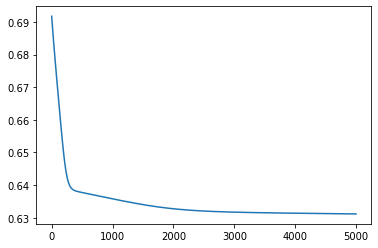

In [154]:
# viewing trend in loss
plt.plot(loss_store)
#loss_store

In [155]:
# applying to test set
Z_1 = np.dot(W_1, test_input) + B_1
A_1 = relu(Z_1)
Z_2 = np.dot(W_2, A_1) + B_2
Z_2 = Z_2.astype(np.float) 
predictions = sigmoid(Z_2)


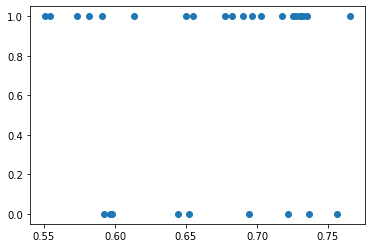

In [156]:
# evaluating accuracy on test set: nothing to write home about
plt.scatter(predictions, test_labs)

In [157]:
predictions

array([[0.65463326, 0.73100814, 0.6942272 , 0.71791519, 0.70271266,
        0.72756275, 0.59807019, 0.61354685, 0.59615428, 0.68209287,
        0.73027719, 0.55093401, 0.72565872, 0.73248185, 0.69637838,
        0.5818068 , 0.65023379, 0.64444493, 0.75649049, 0.57319804,
        0.73521948, 0.76526855, 0.65202435, 0.6899524 , 0.5539079 ,
        0.59252686, 0.72166662, 0.59110417, 0.67763687, 0.7364684 ]])